In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('/content/train.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Task
Explain the preprocessing, feature scaling, and exploratory data analysis techniques that should be applied to the dataset "data.csv".

## Data preprocessing

### Subtask:
Handle missing values in the dataset.


**Reasoning**:
Identify columns with missing values to determine which columns need to be handled.



In [4]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Reasoning**:
Impute missing values in 'Age' with the mean and in 'Embarked' with the mode, as 'Cabin' has too many missing values to impute effectively for this subtask.



In [5]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


## Feature engineering

### Subtask:
Create a new feature based on existing columns.


**Reasoning**:
Create the 'FamilySize' and 'IsAlone' columns based on the instructions.



In [6]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data['IsAlone'] = (data['FamilySize'] == 1).astype(int)
display(data[['SibSp', 'Parch', 'FamilySize', 'IsAlone']].head())

,SibSp,Parch,FamilySize,IsAlone
0,1,0,2,0
1,1,0,2,0
2,0,0,1,1
3,1,0,2,0
4,0,0,1,1


## Encode categorical variables

### Subtask:
Convert categorical columns into numerical representations.


**Reasoning**:
Convert the categorical columns 'Sex' and 'Embarked' into numerical representations using one-hot encoding and concatenate with the original DataFrame, dropping the original columns. Then display the head of the modified DataFrame to verify.



In [7]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
display(data.head())

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,2,0,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,2,0,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,1,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,2,0,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,1,True,False,True


## Exploratory data analysis (eda)

### Subtask:
Visualize the relationships between features and the target variable.


**Reasoning**:
Create a correlation matrix including the 'Survived' column and visualize it using a heatmap to understand the linear relationships between numerical features and the target variable.



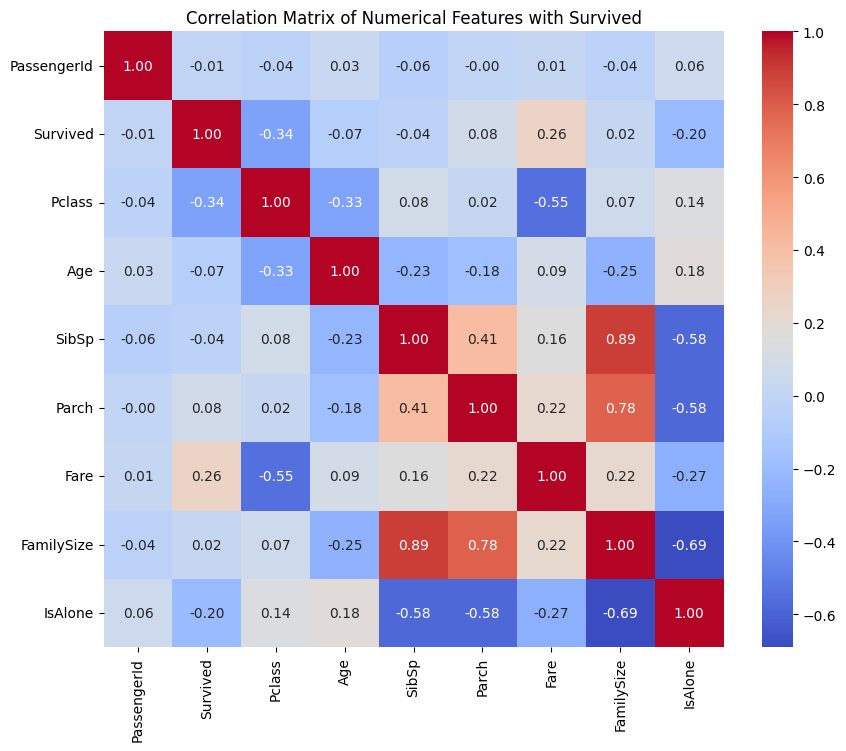

In [8]:
numerical_data = data.select_dtypes(include=np.number)
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features with Survived')
plt.show()

**Reasoning**:
Create visualizations to explore the relationship between 'Survived' and other potentially relevant features such as 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', and 'IsAlone' using appropriate plot types.



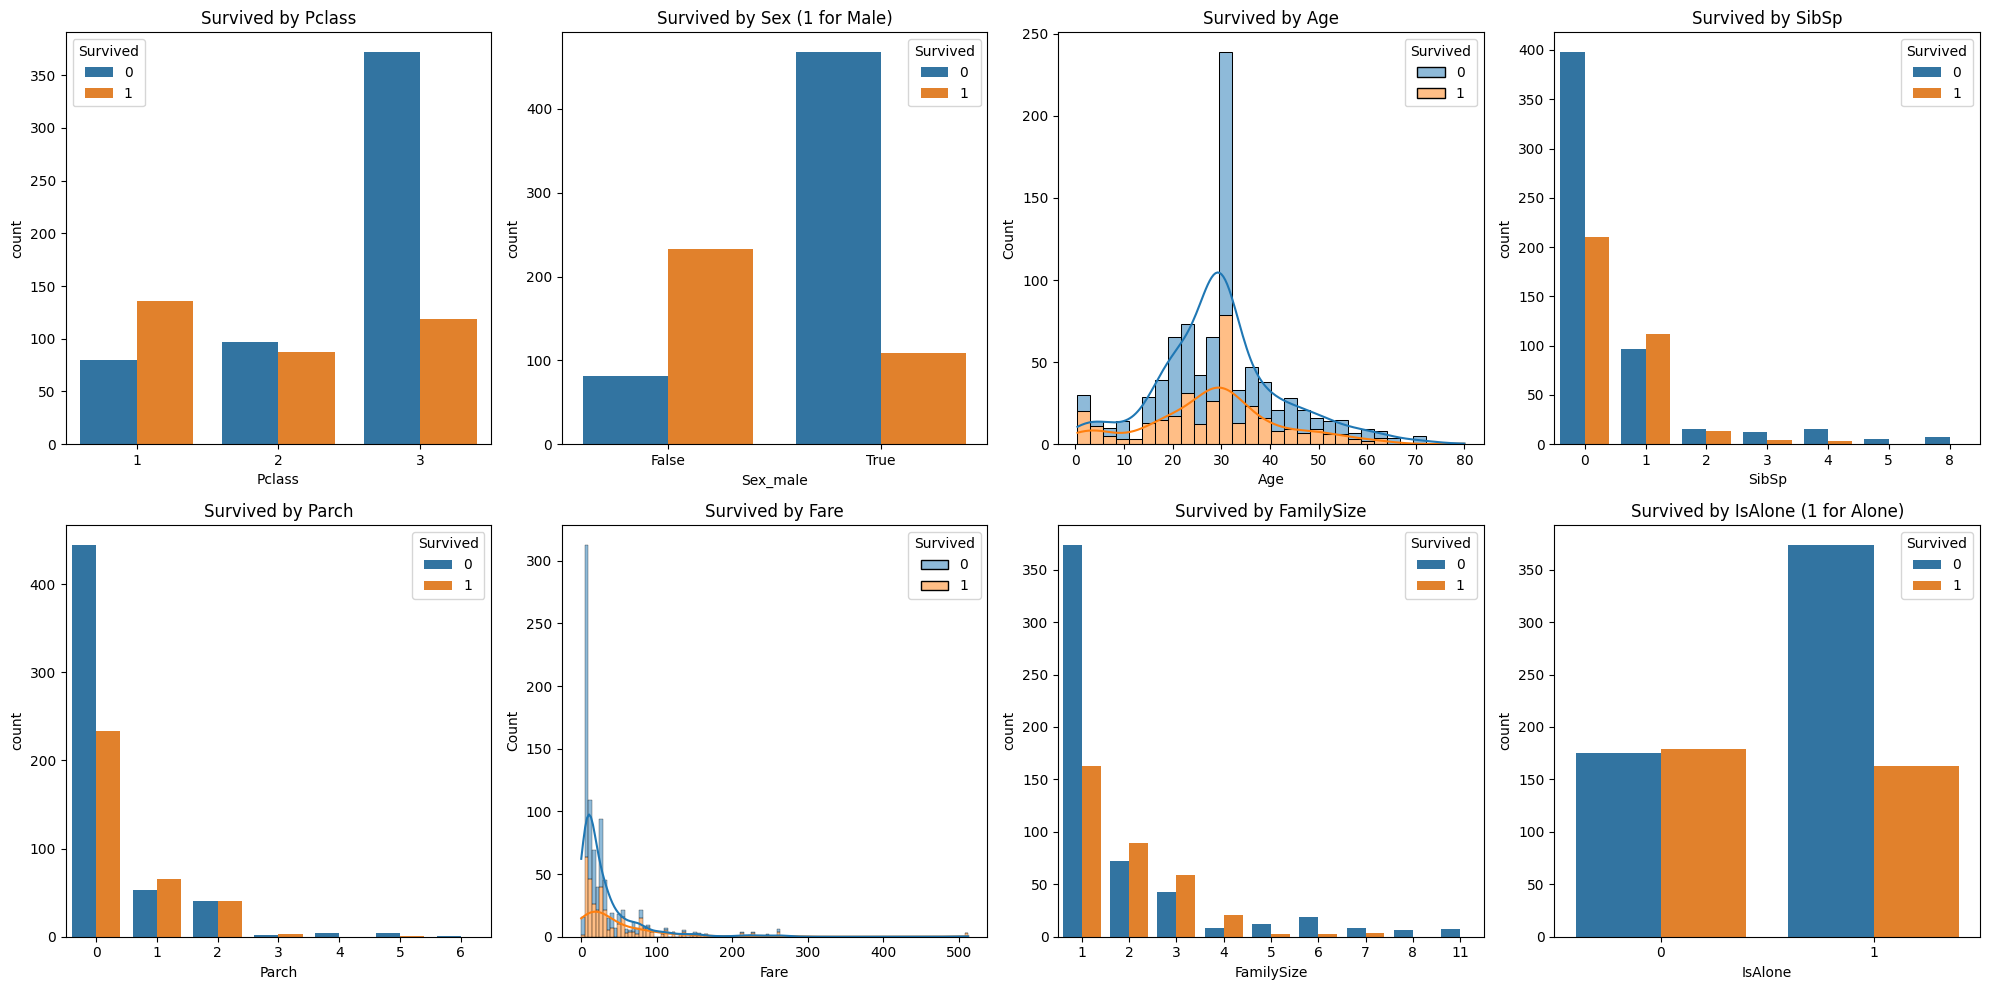

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()

sns.countplot(x='Pclass', hue='Survived', data=data, ax=axes[0])
axes[0].set_title('Survived by Pclass')

sns.countplot(x='Sex_male', hue='Survived', data=data, ax=axes[1])
axes[1].set_title('Survived by Sex (1 for Male)')

sns.histplot(data=data, x='Age', hue='Survived', multiple="stack", kde=True, ax=axes[2])
axes[2].set_title('Survived by Age')

sns.countplot(x='SibSp', hue='Survived', data=data, ax=axes[3])
axes[3].set_title('Survived by SibSp')

sns.countplot(x='Parch', hue='Survived', data=data, ax=axes[4])
axes[4].set_title('Survived by Parch')

sns.histplot(data=data, x='Fare', hue='Survived', multiple="stack", kde=True, ax=axes[5])
axes[5].set_title('Survived by Fare')

sns.countplot(x='FamilySize', hue='Survived', data=data, ax=axes[6])
axes[6].set_title('Survived by FamilySize')

sns.countplot(x='IsAlone', hue='Survived', data=data, ax=axes[7])
axes[7].set_title('Survived by IsAlone (1 for Alone)')

plt.tight_layout()
plt.show()

## Feature scaling

### Subtask:
Apply feature scaling to numerical features.


**Reasoning**:
Apply StandardScaler to the selected numerical features and create a new DataFrame with the scaled features.



In [10]:
from sklearn.preprocessing import StandardScaler

numerical_cols_to_scale = numerical_data.drop(['PassengerId', 'Survived'], axis=1).columns

scaler = StandardScaler()

scaled_numerical_features = scaler.fit_transform(data[numerical_cols_to_scale])

scaled_numerical_df = pd.DataFrame(scaled_numerical_features, columns=numerical_cols_to_scale)

display(scaled_numerical_df.head())

,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445,0.059160,-1.231645
1,-1.566107,0.638789,0.432793,-0.473674,0.786845,0.059160,-1.231645
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,-0.560975,0.811922
3,-1.566107,0.407926,0.432793,-0.473674,0.420730,0.059160,-1.231645
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337,-0.560975,0.811922


## Summary:

### Data Analysis Key Findings

*   Initially, the 'Age' column had 177 missing values and 'Embarked' had 2, which were successfully imputed with the mean and mode respectively. The 'Cabin' column still retains 687 missing values.
*   New features 'FamilySize' (sum of 'SibSp', 'Parch', and 1) and 'IsAlone' (1 if 'FamilySize' is 1, else 0) were successfully created.
*   Categorical variables 'Sex' and 'Embarked' were successfully converted into numerical representations using one-hot encoding, creating 'Sex\_male', 'Embarked\_Q', and 'Embarked\_S' columns.
*   The correlation heatmap indicated linear relationships between numerical features and 'Survived'.
*   Individual plots visualized the relationship of 'Survived' with 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', and 'IsAlone', revealing how survival rates vary across categories or ranges of these features.
*   Numerical features ('Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone') were successfully scaled using `StandardScaler`, resulting in values centered around zero with a standard deviation of one.

### Insights or Next Steps

*   Investigate strategies to handle the large number of missing values in the 'Cabin' column, possibly through imputation, feature engineering, or exclusion, depending on its potential impact on the analysis or model.
*   Utilize the scaled numerical features and encoded categorical features to train a machine learning model for predicting survival, evaluating the model's performance based on the chosen evaluation metrics.


In [11]:
data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,2,0,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,2,0,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,1,1,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,2,0,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,1,1,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,NaN,1,1,True,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,1,1,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,NaN,4,0,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148,1,1,True,False,False


In [15]:
data = data.drop('Cabin', axis=1)

In [16]:
data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,2,0,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,2,0,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,1,1,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,2,0,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,1,1,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,1,1,True,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,1,1,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,4,0,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,1,1,True,False,False


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [18]:
data = data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
display(data.head())

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,2,0,True,False,True
1,1,1,38.0,1,0,71.2833,2,0,False,False,False
2,1,3,26.0,0,0,7.9250,1,1,False,False,True
3,1,1,35.0,1,0,53.1000,2,0,False,False,True
4,0,3,35.0,0,0,8.0500,1,1,True,False,True


In [21]:
features = data.drop('Survived', axis=1)
target = data['Survived']
X = features
y = target
print("Features:")
display(X.head())

print("\nTarget:")
display(y.head())

Features:


,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,2,0,True,False,True
1,1,38.0,1,0,71.2833,2,0,False,False,False
2,3,26.0,0,0,7.9250,1,1,False,False,True
3,1,35.0,1,0,53.1000,2,0,False,False,True
4,3,35.0,0,0,8.0500,1,1,True,False,True



Target:


,Survived
0,0
1,1
2,1
3,1
4,0


In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
y_pred = model.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred)

In [32]:
accuracy

0.776536312849162

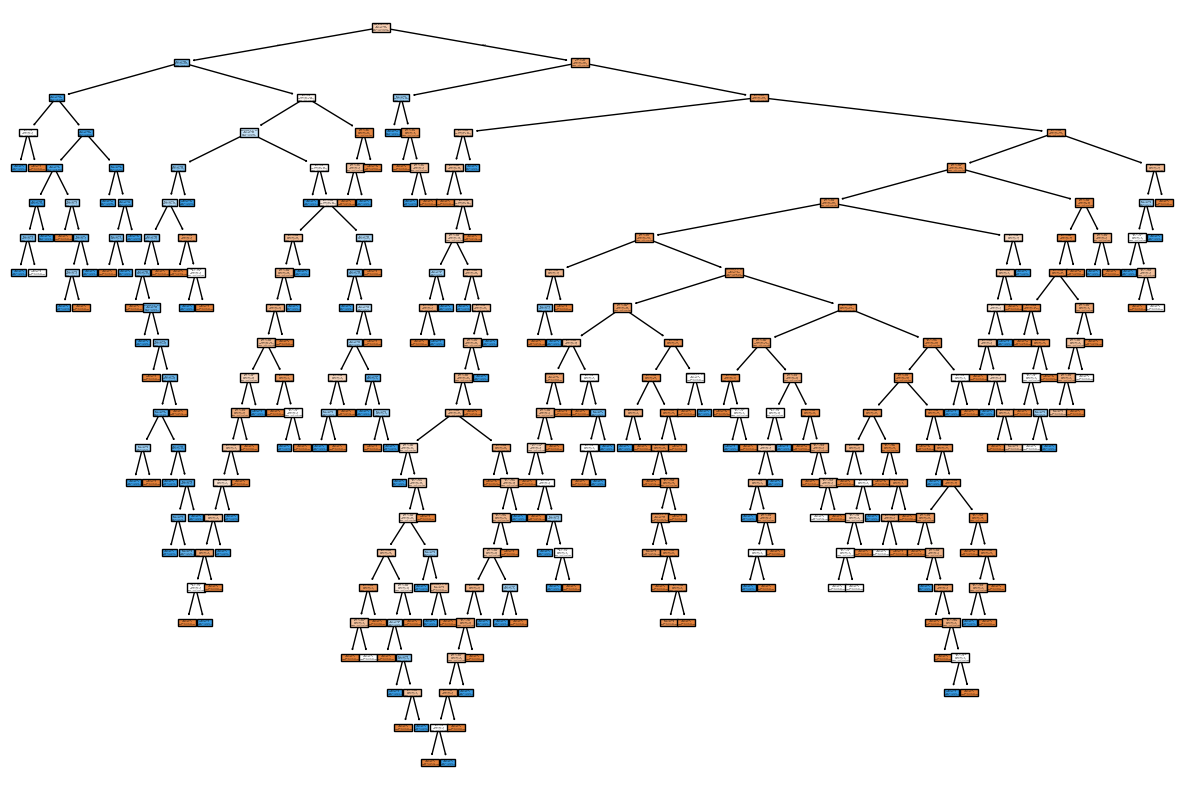

In [33]:
# prompt: plot the tree

import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model, feature_names=X.columns.tolist(), class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
